<a href="https://colab.research.google.com/github/sdecarlini/Coder_DataScience1_PFinal/blob/main/Proyecto_ParteIII_Decarlini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Proyecto Final DS / Santiago Decarlini

# Presentación del proyecto

## Abstracto
En este proyecto, nos proponemos desarrollar un modelo de pronóstico de ventas preciso para Global Superstore. Utilizando técnicas de inteligencia artificial y análisis de series temporales, buscaremos identificar patrones y tendencias en los datos históricos de ventas para realizar predicciones futuras. El objetivo es proporcionar a la empresa una herramienta valiosa para optimizar la planificación, gestionar el inventario de manera eficiente y tomar decisiones estratégicas basadas en datos.

## Contexto comercial y analítico

A través del análisis exploratorio de datos, identificaremos los factores que influyen en las ventas de Global Superstore. Posteriormente, emplearemos modelos de forecasting como Prophet, ARIMA y GMLNet para generar proyecciones precisas de la demanda futura. Estos modelos nos permitirán comprender la dinámica de las ventas y anticipar fluctuaciones estacionales y tendencias a largo plazo.

## Preguntas/ hipótesis a resolver

- ¿Cuál es el modelo de forecasting más adecuado para predecir las ventas de Global Superstore, considerando la naturaleza de los datos y el horizonte de tiempo de las predicciones?
- ¿Existen patrones estacionales o cíclicos en las ventas que deban ser considerados en el modelo de pronóstico?
- ¿Cómo afectan los eventos externos (por ejemplo, promociones, lanzamientos de nuevos productos) a las ventas y cómo podemos incorporarlos al modelo de forecasting?

## Objetivo

El objetivo principal de este proyecto es desarrollar un modelo de forecasting de ventas preciso y confiable que permita a Global Superstore:

- **Optimizar la planificación**: Ajustar los niveles de inventario y la producción en función de las previsiones de demanda.
- **Tomar decisiones estratégicas**: Informar las decisiones sobre la asignación de recursos, el lanzamiento de nuevos productos y la expansión a nuevos mercados.
- **Mejorar la eficiencia operativa**: Reducir los costos asociados a la sobreproducción o la escasez de inventario.

## Fuente de los datos

Para el presente trabajo se utilizó un dataset de Kaggle “Global Superstore: Statistical Analysis and Visualization”, una simulación de operaciones de ventas de retail de una empresa de artículos de oficina, con venta en múltiples países. El conjunto de datos utilizado ofrece una panorámica detallada de las transacciones comerciales, incluyendo información sobre clientes, órdenes y productos.

Link a la fuente de datos: https://www.kaggle.com/datasets/shekpaul/global-superstore/data

# Lectura de datos

In [ ]:
# Importamos las librerías necesarias, y montamos Google Drive

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Configuración del entorno de python en colab

ruta_archivo = '/content/drive/MyDrive/Coderhouse/2. Data Science I/Proyecto Final/Global_Superstore.xls'
df = pd.read_excel(ruta_archivo)
df.to_csv('Global_Superstore.csv', index=False) #guardamos como csv dentro de Colab

## Análisis inicial del dataset

In [ ]:
print("El dataset tiene", df.shape[0], "filas y", df.shape[1], "columnas.")

El dataset tiene 51290 filas y 24 columnas.


In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [ ]:
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
51285,29002,IN-2014-62366,2014-06-19,2014-06-19,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,...,OFF-FA-10000746,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,0.010,Medium
51286,35398,US-2014-102288,2014-06-20,2014-06-24,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,...,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100,0.010,Medium
51287,40470,US-2013-155768,2013-12-02,2013-12-02,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,...,OFF-EN-10001219,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.920,3,0.0,11.2308,0.010,High
51288,9596,MX-2012-140767,2012-02-18,2012-02-22,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,...,OFF-BI-10000806,Office Supplies,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,0.003,Medium
51289,6147,MX-2012-134460,2012-05-22,2012-05-26,Second Class,MC-18100,Mick Crebagga,Consumer,Tipitapa,Managua,...,OFF-PA-10004155,Office Supplies,Paper,"Eaton Computer Printout Paper, 8.5 x 11",61.380,3,0.0,1.8000,0.002,High


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [ ]:
df.dtypes

,0
Row ID,int64
Order ID,object
Order Date,datetime64[ns]
Ship Date,datetime64[ns]
Ship Mode,object
Customer ID,object
Customer Name,object
Segment,object
City,object
State,object


In [ ]:
df.dtypes.value_counts()

,count
object,15
float64,5
int64,2
datetime64[ns],2


In [ ]:
#columns
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

## Descripción de variables

**Resumen general:**
- El dataset cuenta con 24 columnas y 51290 filas.
- Del total de 24 columnas, únicamente una ("Postal Code") cuenta con datos nulos. Esto se debe posiblemente a que sólo los clientes de USA cuentan con un código postal declarado. Se determina eliminar esta columna del análisis.
- Columnas de identificación: Row ID, Order ID, Customer ID, Product ID, Postal Code
- Columnas numéricas: Sales, Quantity, Discount, Profit, Shipping Cost
- Columnas categóricas: Ship Mode, Segment, Country, Market, Region, Category, Sub-Category, Order Priority
- Las fechas están en formato YYYY-MM-DD.

**Descripción de variables:**
- Row ID: Identificador único de cada fila
- Order ID: Identificador único para cada pedido
- Order Date: Fecha en la que se realizó el pedido
- Ship Date: Fecha en la que se envió el pedido
-Ship Mode: Método utilizado para enviar el pedido (ej. Express, Estándar, etc)
- Customer ID: Identificador único para cada cliente
- Customer Name: Nombre del cliente
- Segment: Segmento del cliente (ej. Consumidor, Corporate, etc)
- City: Ciudad donde reside el cliente
- State: Estado donde reside el cliente
- Country: País donde reside el cliente
- Postal Code: Código postal de la residencia del cliente (sólo disponible para clientes de USA)
- Market: Mercado o Unidad de Negocios
- Region: Región geográfica donde reside el cliente
- Product ID: Identificador único para cada producto
- Category: Categoría amplia del producto (ej. Muebles, suministros de oficina, tecnología)
- Sub-Category: Sub-categoría específica del producto
- Product Name: Nombre del producto
- Sales: Ingresos totales por la venta del producto
- Quantity: Número de unidades del producto vendidas
- Discount: Descuento aplicado al producto
- Profit: Ganancia total obtenida del producto
- Shipping Cost: Costo del envío del producto
- Order Priority: Nivel de prioridad de la orden

## Resumen estadístico

In [ ]:
# Resumen estadístico de las columnas numéricas
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,51290,51290,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,2013-05-11 21:26:49.155781120,2013-05-15 20:42:42.745174528,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375818
min,1.00000,2011-01-01 00:00:00,2011-01-03 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.002000
25%,12823.25000,2012-06-19 00:00:00,2012-06-23 00:00:00,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,2013-07-08 00:00:00,2013-07-12 00:00:00,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,2014-05-22 00:00:00,2014-05-26 00:00:00,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,2014-12-31 00:00:00,2015-01-07 00:00:00,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000
std,14806.29199,NaN,NaN,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296810


In [ ]:
# Resumen estadístico de las columnas numéricas y categóricas
df.describe(include='all')

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
count,51290.00000,51290,51290,51290,51290,51290,51290,51290,51290,51290,...,51290,51290,51290,51290,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290
unique,NaN,25035,NaN,NaN,4,1590,795,3,3636,1094,...,10292,3,17,3788,NaN,NaN,NaN,NaN,NaN,4
top,NaN,CA-2014-100111,NaN,NaN,Standard Class,PO-18850,Muhammed Yedwab,Consumer,New York City,California,...,OFF-AR-10003651,Office Supplies,Binders,Staples,NaN,NaN,NaN,NaN,NaN,Medium
freq,NaN,14,NaN,NaN,30775,97,108,26518,915,2001,...,35,31273,6152,227,NaN,NaN,NaN,NaN,NaN,29433
mean,25645.50000,NaN,2013-05-11 21:26:49.155781120,2013-05-15 20:42:42.745174528,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,246.490581,3.476545,0.142908,28.610982,26.375818,NaN
min,1.00000,NaN,2011-01-01 00:00:00,2011-01-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000,0.002000,NaN
25%,12823.25000,NaN,2012-06-19 00:00:00,2012-06-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,30.758625,2.000000,0.000000,0.000000,2.610000,NaN
50%,25645.50000,NaN,2013-07-08 00:00:00,2013-07-12 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,85.053000,3.000000,0.000000,9.240000,7.790000,NaN
75%,38467.75000,NaN,2014-05-22 00:00:00,2014-05-26 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,251.053200,5.000000,0.200000,36.810000,24.450000,NaN
max,51290.00000,NaN,2014-12-31 00:00:00,2015-01-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,22638.480000,14.000000,0.850000,8399.976000,933.570000,NaN


In [ ]:
# Resumen estadístico, con ancho de visualización ajustado
pd.set_option('display.max_columns', None)
print(df.describe(include='all'))

             Row ID        Order ID                     Order Date  \
count   51290.00000           51290                          51290   
unique          NaN           25035                            NaN   
top             NaN  CA-2014-100111                            NaN   
freq            NaN              14                            NaN   
mean    25645.50000             NaN  2013-05-11 21:26:49.155781120   
min         1.00000             NaN            2011-01-01 00:00:00   
25%     12823.25000             NaN            2012-06-19 00:00:00   
50%     25645.50000             NaN            2013-07-08 00:00:00   
75%     38467.75000             NaN            2014-05-22 00:00:00   
max     51290.00000             NaN            2014-12-31 00:00:00   
std     14806.29199             NaN                            NaN   

                            Ship Date       Ship Mode Customer ID  \
count                           51290           51290       51290   
unique               

### Observaciones del resumen estadístico

> **Row ID, Order ID**:
Estos son identificadores únicos, y no requieren un análisis estadístico en profundidad. Sin embargo, el conteo nos indica que contamos 51,290 transacciones, y 25,035 órdenes únicas.

> **Order Date, Ship Date**:
Estas fechas nos dan una idea del período de tiempo cubierto por los datos, y la rapidez con la que se procesan los pedidos. Los pedidos se realizaron entre enero de 2011 y diciembre de 2014, cubriendo un período de casi cuatro años.

> **Customer ID, Customer Name**: Hay 1590 clientes únicos en el dataset. El hecho de que "Muhammed Yedwab" sea el cliente que aparece con más frecuencia (108 veces) sugiere que este cliente es un comprador habitual o un cliente mayorista.

> **Segment**: El segmento "Consumer" es el más dominante, lo que indica que la mayor parte de las ventas se realizan a consumidores individuales.

> **City, State, Country**: La mayoría de los pedidos se realizaron en los Estados Unidos. Analizando los resultados de State y City podemos detectar un **error en los datos**, ya que evidentemente "New York City" no se encuentra en el estado de California. Dado que dichas columnas (*State, City*) no pueden asegurar una integridad, no serán consideradas para el análisis, y por lo tanto removidas del dataframe en la siguiente fase de limpieza del set de datos.

> **Product ID, Category, Sub-Category**: La categoría "Office Supplies" es la más vendida, y el producto "Staples" es el más popular. Esto sugiere que los suministros de oficina son la línea de productos principal, respaldado por el hecho de que la sub-categoría más vendida fue "Binders".

> **Sales**:
El valor promedio de las ventas (ticket promedio) en el período fue de 246.49, y la venta más alta registrada tuvo un valor de 22,638. El valor mínimo fue de 0.4; aún sin determinar si se trata de una anomalía, o de un producto de muy bajo costo. La desviación estándar de esta variable es alta, lo que indica que hay una gran variabilidad en los valores de venta (cosa esperable de una compañía que vende un gran rango de productos).

> **Quantity**:
Los usuarios compran un promedio de 3.48 unidades por orden, y la orden con mayor cantidad de unidades vendidas fue de 14. De forma esperable, el mínimo registrado en la columna es 1, ya que se requiere al menos una unidad para que la venta sea válida.

> **Discount**:
El descuento promedio es de 14.29%, lo que sugiere que los descuentos son una estrategia de ventas común. El máximo descuento registrado fue de 85%, y el mínimo en 0% (de forma esperable, ya que aplicar un descuento en todas las ventas no representa un modelo de negocios viable en el largo plazo). La desviación estándar indica que hay una variabilidad en los descuentos aplicados.

> **Profit**:
La ganancia promedio es de $28.61, lo que sugiere que en general las ventas son rentables. Sin embargo, el valor mínimo negativo indica que hay pedidos que generaron pérdidas.

> **Shipping Cost**:
El costo de envío promedio fue de 26.38 y la orden con el costo de envío más alto fue de 933. Se encontró un valor mínimo de 0.002; aún no he determinado si se trata de una anomalía, o de un producto intangible o de muy bajo peso, con un costo de envío despreciable (ej. licencias de productos digitales, microchips, tarjetas de memoria, etc). La alta desviación de los datos es esperable, dado el rango de productos de distintas categorías vendidos por la empresa.

> **Logística y envíos**:
El método de envío más utilizado fue "Standard Class", mientras que el Order Priority más utilizado fue "Medium".



### Matriz de correlación de variables

In [ ]:
# Matriz de correlación entre las columnas numéricas
df_numeric = df.select_dtypes(include=['int64', 'float64'])
df_numeric.corr()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
Row ID,1.000000,0.009671,-0.043889,-0.173483,0.087594,-0.019037,-0.039076
Postal Code,0.009671,1.000000,-0.023854,0.012761,0.058443,-0.029961,-0.025449
Sales,-0.043889,-0.023854,1.000000,0.313577,-0.086722,0.484918,0.768073
Quantity,-0.173483,0.012761,0.313577,1.000000,-0.019875,0.104365,0.272649
Discount,0.087594,0.058443,-0.086722,-0.019875,1.000000,-0.316490,-0.079055
Profit,-0.019037,-0.029961,0.484918,0.104365,-0.316490,1.000000,0.354441
Shipping Cost,-0.039076,-0.025449,0.768073,0.272649,-0.079055,0.354441,1.000000


#### Observaciones de la matriz de correlación de variables numéricas

**Correlaciones positivas fuertes:**

- **Sales & Shipping Cost (0.768)**: Esta fuerte relación directa confirma que a mayor valor de la venta, mayor es el costo de envío. Esto es lógico, ya que pedidos de mayor valor suelen requerir envíos más grandes o con servicios adicionales, lo que incrementa el costo.

- **Sales & Profit (0.485)**: La correlación positiva moderada indica que a mayor valor de la venta, mayor es la ganancia. Sin embargo, otros factores como los descuentos pueden influir en esta relación.

**Correlaciones positivas débiles:**

- **Sales & Quantity (0.313)**: Aunque hay una correlación positiva, no es tan fuerte como la de Sales y Shipping Cost. Esto sugiere que mientras que un aumento en la cantidad vendida generalmente lleva a un aumento en el valor total de la venta, no es una relación lineal perfecta. Otros factores, como el precio unitario, pueden influir.

- **Quantity & Shipping Cost (0.273)**: Hay una ligera relación positiva. A mayor cantidad vendida, puede haber un ligero aumento en el costo de envío.

**Correlación negativa:**

- **Discount & Profit (-0.316)**: Una relación negativa indica que a mayor descuento, menor es la ganancia. Esto es lógico, ya que los descuentos reducen el margen de ganancia.

**Observaciones adicionales:**

- **Sales & Quantity**: Aunque hay una relación positiva, no es tan fuerte como cabría esperar. Esto podría indicar que existen productos con un alto valor unitario que se venden en pequeñas cantidades, o viceversa.

- **Discount & otras variables**: Los descuentos no parecen tener una correlación significativa con otras variables como el costo de envío o la cantidad vendida, lo que sugiere que la política de descuentos no está directamente relacionada con estos factores.

# Data Wrangling

## Limpieza de datos

### Duplicados y nulos

In [ ]:
# Identificación de valores duplicados
df.duplicated().sum()

0

In [ ]:
## Identificación de valores nulos
df.isnull().sum()
print(df.isnull().sum())

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64


### Eliminación de columnas

**Se eliminarán las siguientes columnas:**
- RowID: No aporta valor significativo más que el ID único de cada fila.
- Postal Code: Posee gran cantidad de valores nulos. Si bien podría enriquecerse, no es el foco del presente análisis.
- State: Posee errores

Por la gran cantidad de valores únicos que poseen, codificar las siguientes variables de forma numérica supondría un impacto fuerte al **rendimiento** del código, sin obtener un aporte de valor significativo. Por este motivo, también serán eliminadas:
- City
- Country
- Product Name
- Product ID
- Customer Name
- Customer ID


In [ ]:
# Eliminamos las columnas del dataframe
df = df.drop(['Row ID', 'Postal Code', 'State', 'City', 'Country', 'Product Name', 'Product ID', 'Customer Name', 'Customer ID',], axis=1)

In [ ]:
# Revisión de cambios
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Segment,Market,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,CA-2012-124891,2012-07-31,2012-07-31,Same Day,Consumer,US,East,Technology,Accessories,2309.650,7,0.0,762.1845,933.57,Critical
1,IN-2013-77878,2013-02-05,2013-02-07,Second Class,Corporate,APAC,Oceania,Furniture,Chairs,3709.395,9,0.1,-288.7650,923.63,Critical
2,IN-2013-71249,2013-10-17,2013-10-18,First Class,Consumer,APAC,Oceania,Technology,Phones,5175.171,9,0.1,919.9710,915.49,Medium
3,ES-2013-1579342,2013-01-28,2013-01-30,First Class,Home Office,EU,Central,Technology,Phones,2892.510,5,0.1,-96.5400,910.16,Medium
4,SG-2013-4320,2013-11-05,2013-11-06,Same Day,Consumer,Africa,Africa,Technology,Copiers,2832.960,8,0.0,311.5200,903.04,Critical


### Estandarización de nombre de variables

In [ ]:
# Pasamos a lowercase y usamos guión bajo como separador
df.columns = df.columns.str.lower().str.replace(' ', '_')
print(df.columns)

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'segment', 'market',
       'region', 'category', 'sub-category', 'sales', 'quantity', 'discount',
       'profit', 'shipping_cost', 'order_priority'],
      dtype='object')


In [ ]:
# Renombramos "sub-category" que escapó el filtro anterior
df = df.rename(columns={'sub-category': 'sub_category'})
print(df.columns)

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'segment', 'market',
       'region', 'category', 'sub_category', 'sales', 'quantity', 'discount',
       'profit', 'shipping_cost', 'order_priority'],
      dtype='object')


In [ ]:
# Revisión de cambios
columns = df.columns
print(columns)

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'segment', 'market',
       'region', 'category', 'sub_category', 'sales', 'quantity', 'discount',
       'profit', 'shipping_cost', 'order_priority'],
      dtype='object')


### Modificación de columnas de fecha

In [ ]:
# Pasamos a un formato YYYY-MM-DD, eliminando HH-MM-SS
df['order_date'] = pd.to_datetime(df['order_date']).dt.date
df['ship_date'] = pd.to_datetime(df['ship_date']).dt.date

In [ ]:
# Cambiamos las columnas order_date y ship_date a dtype de fecha
df['order_date'] = pd.to_datetime(df['order_date'])
df['ship_date'] = pd.to_datetime(df['ship_date'])

In [ ]:
# revision de cambios de datatype
df.dtypes

,0
order_id,object
order_date,datetime64[ns]
ship_date,datetime64[ns]
ship_mode,object
segment,object
market,object
region,object
category,object
sub_category,object
sales,float64


### Redondeo de decimales

In [ ]:
# Redondeamos los valores decimales
df['sales'] = df['sales'].round(2)
df['profit'] = df['profit'].round(2)
df['shipping_cost'] = df['shipping_cost'].round(2)
df['discount'] = df['discount'].round(4)

## Transformación de datos

### Creación de nuevas columnas

In [ ]:
# Creación de nueva columna "dayofweek" en base a order_date
df['dayofweek'] = df['order_date'].dt.dayofweek

In [ ]:
# Creación de nueva columna "dayofmonth" en base a order_date
df['dayofmonth'] = df['order_date'].dt.day

In [ ]:
# Creación de nueva columna "month" en base a order_date
df['month'] = df['order_date'].dt.month

In [ ]:
# Creación de nueva columna "year" en base a order_date
df['year'] = df['order_date'].dt.year

In [ ]:
#Revisión de cambios
df.head()

,order_id,order_date,ship_date,ship_mode,segment,market,region,category,sub_category,sales,quantity,discount,profit,shipping_cost,order_priority,dayofweek,dayofmonth,month,year
0,CA-2012-124891,2012-07-31,2012-07-31,Same Day,Consumer,US,East,Technology,Accessories,2309.65,7,0.0,762.18,933.57,Critical,1,31,7,2012
1,IN-2013-77878,2013-02-05,2013-02-07,Second Class,Corporate,APAC,Oceania,Furniture,Chairs,3709.39,9,0.1,-288.76,923.63,Critical,1,5,2,2013
2,IN-2013-71249,2013-10-17,2013-10-18,First Class,Consumer,APAC,Oceania,Technology,Phones,5175.17,9,0.1,919.97,915.49,Medium,3,17,10,2013
3,ES-2013-1579342,2013-01-28,2013-01-30,First Class,Home Office,EU,Central,Technology,Phones,2892.51,5,0.1,-96.54,910.16,Medium,0,28,1,2013
4,SG-2013-4320,2013-11-05,2013-11-06,Same Day,Consumer,Africa,Africa,Technology,Copiers,2832.96,8,0.0,311.52,903.04,Critical,1,5,11,2013


# Análisis Exploratorio de Datos

**Definición de estilo**

In [ ]:
# Definir estilo
plt.style.use('fivethirtyeight')

# Personalizar parámetros del gráfico
plt.rcParams['figure.figsize'] = (10, 6)  # Tamaño de la figura
plt.rcParams['font.family'] = 'sans-serif'  # Familia de fuente
plt.rcParams['font.size'] = 10  # Tamaño de fuente general

# Personalizar elementos del gráfico
plt.rcParams['axes.labelsize'] = 10  # Tamaño de las etiquetas de los ejes
plt.rcParams['xtick.labelsize'] = 10  # Tamaño de las etiquetas del eje x
plt.rcParams['ytick.labelsize'] = 10  # Tamaño de las etiquetas del eje y
plt.rcParams['legend.fontsize'] = 10  # Tamaño de la fuente de la leyenda
plt.rcParams['axes.titlesize'] = 12  # Tamaño de la fuente del título

## Análisis univariado

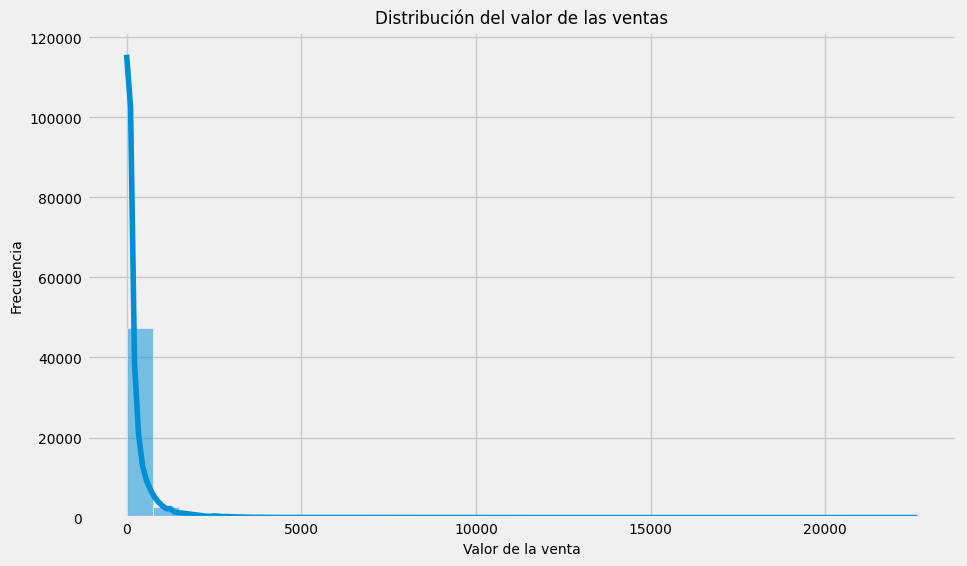

In [ ]:
# Histograma del valor de las ventas
plt.figure(figsize=(10, 6))
sns.histplot(df['sales'], bins=30, kde=True)
plt.title('Distribución del valor de las ventas')
plt.xlabel('Valor de la venta')
plt.ylabel('Frecuencia')
plt.show()


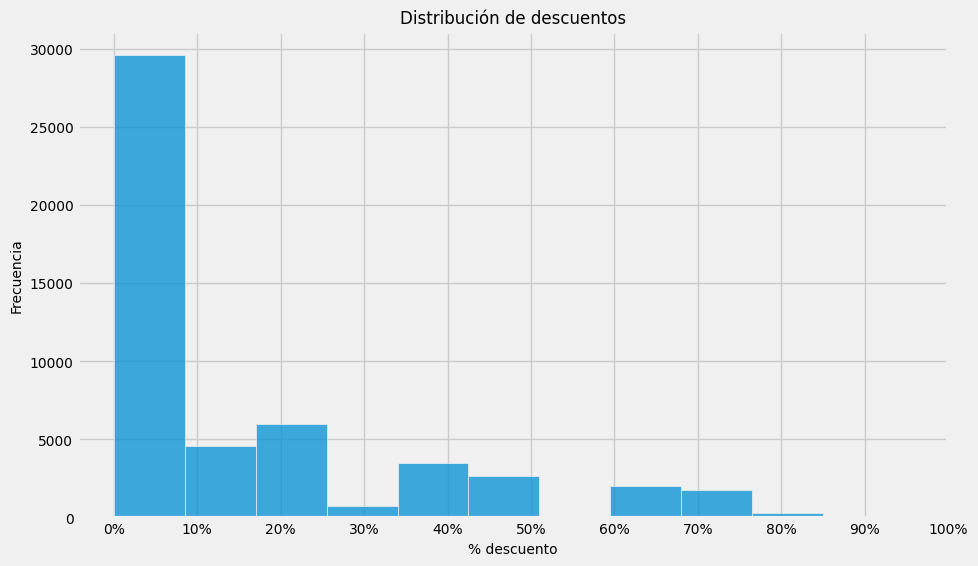

In [ ]:
# Histograma de descuentos
sns.histplot(data=df, x='discount', bins=10)
plt.title('Distribución de descuentos')
plt.xlabel('% descuento')
plt.ylabel('Frecuencia')

# Formatear el eje x como porcentaje y ajustar los ticks
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xticks(ticks=np.arange(0, 1.1, 0.1)) #Ajusta los ticks (0 a 1, paso de 0.1)

plt.show()

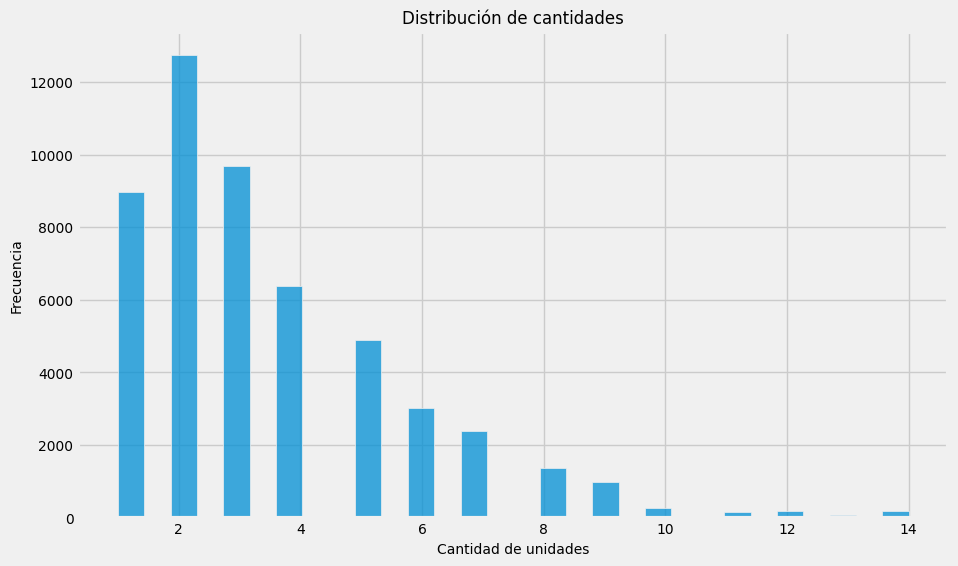

In [ ]:
# Histograma de cantidad de unidades
sns.histplot(data=df, x='quantity', bins=30)
plt.title('Distribución de cantidades')
plt.xlabel('Cantidad de unidades')
plt.ylabel('Frecuencia')
plt.show()

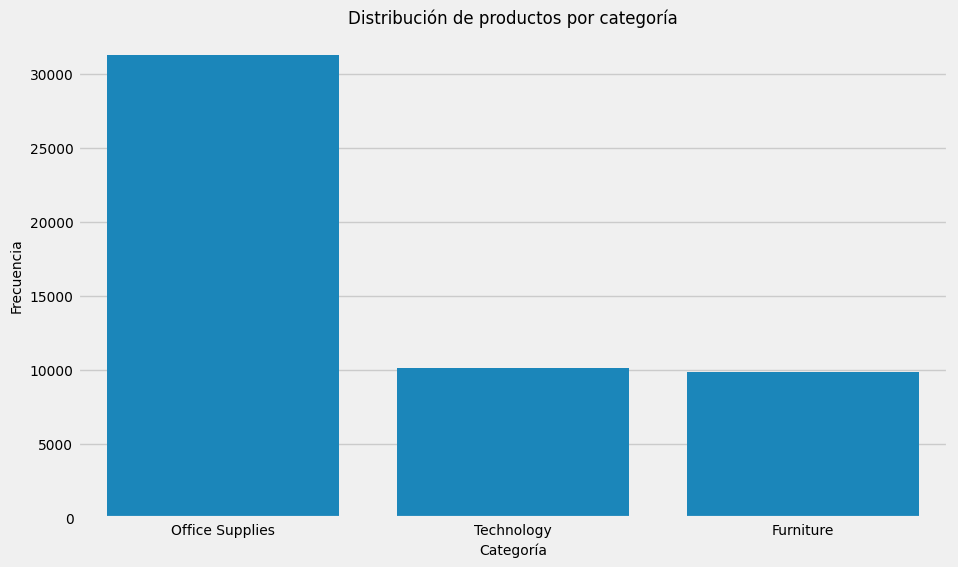

In [ ]:
# Distribución de productos por categoría
sns.countplot(data=df, x='category', order=df['category'].value_counts().index)
plt.title('Distribución de productos por categoría')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.show()

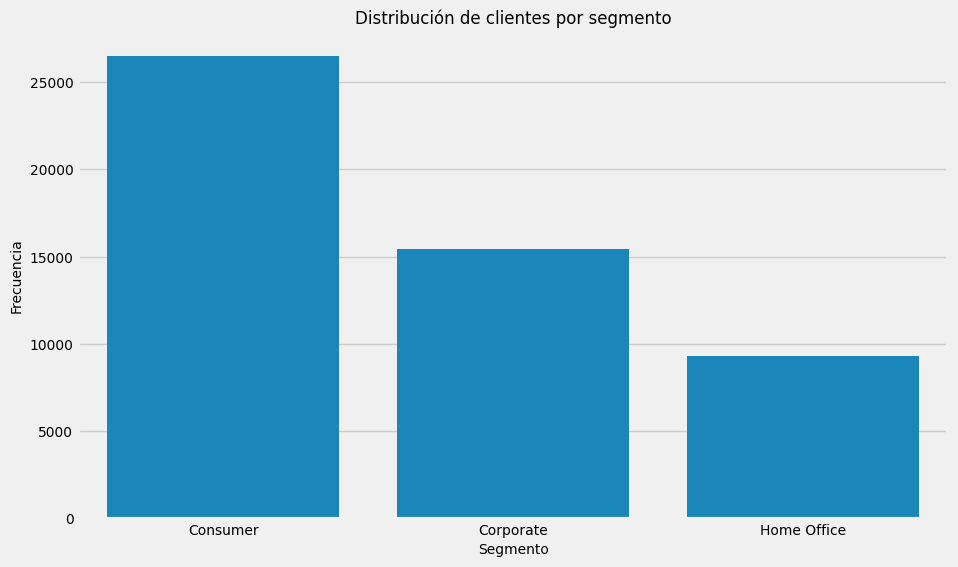

In [ ]:
# Distribución de clientes por segmento
sns.countplot(data=df, x='segment', order=df['segment'].value_counts().index)
plt.title('Distribución de clientes por segmento')
plt.xlabel('Segmento')
plt.ylabel('Frecuencia')
plt.show()

## Análisis bivariado

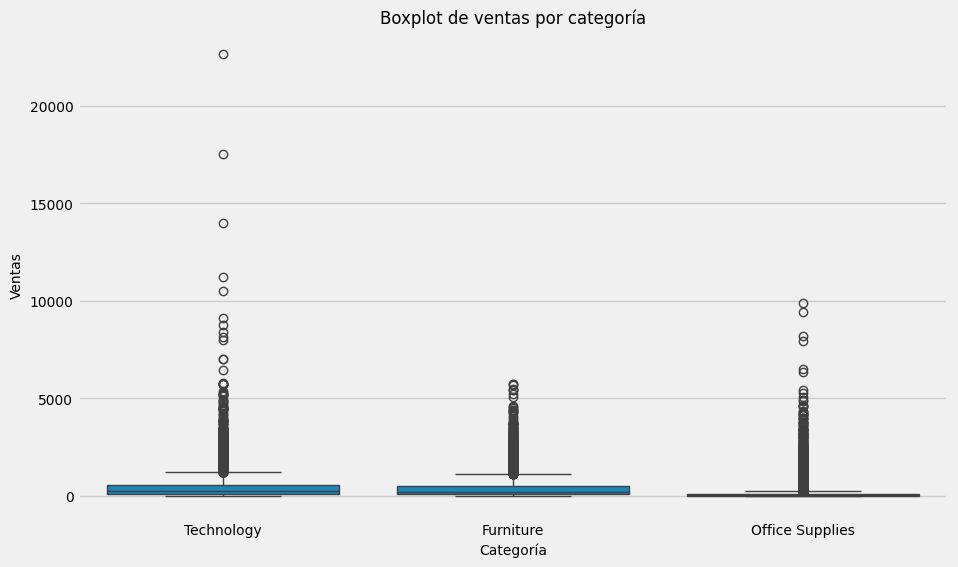

In [ ]:
# Boxplot de ventas por categoría
plt.figure(figsize=(10, 6))
sns.boxplot(x="category", y="sales", data=df)
plt.title("Boxplot de ventas por categoría")
plt.xlabel("Categoría")
plt.ylabel("Ventas")
plt.show()

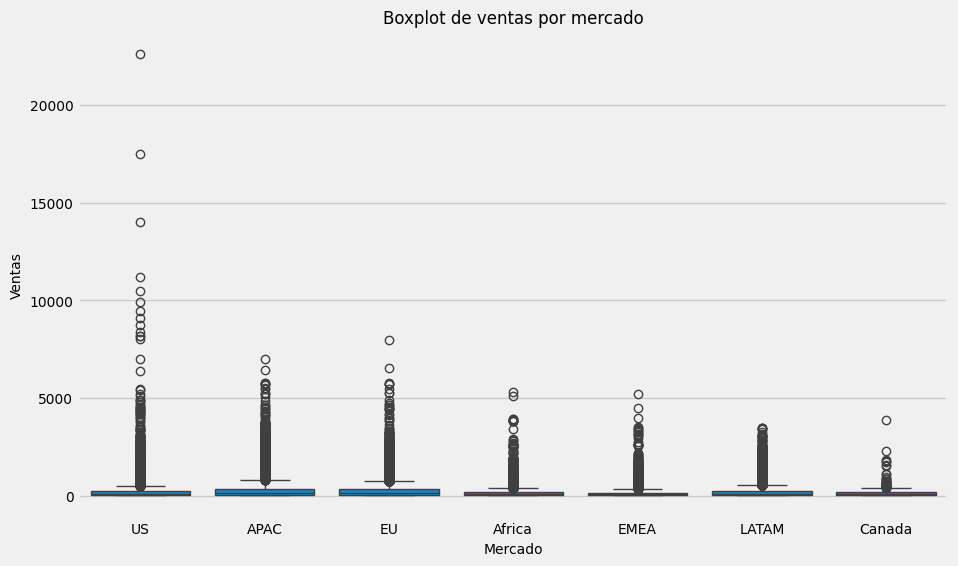

In [ ]:
# Boxplot de ventas por mercado
plt.figure(figsize=(10, 6))
sns.boxplot(x="market", y="sales", data=df)
plt.title("Boxplot de ventas por mercado")
plt.xlabel("Mercado")
plt.ylabel("Ventas")
plt.show()

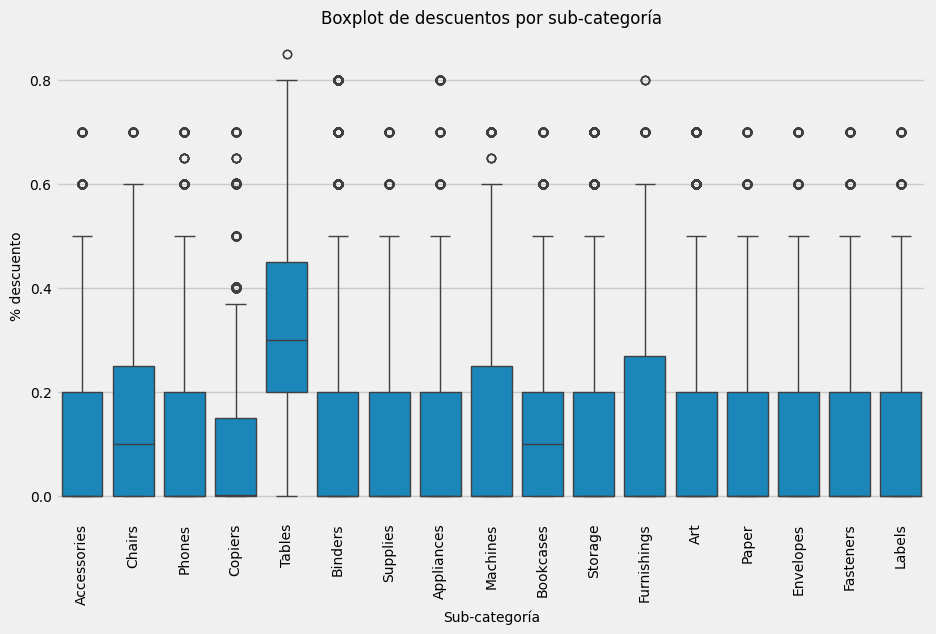

In [ ]:
# Boxplot de descuentos por sub-categoría
plt.figure(figsize=(10, 6))
sns.boxplot(x="sub_category", y="discount", data=df)
plt.title("Boxplot de descuentos por sub-categoría")
plt.xlabel("Sub-categoría")
plt.ylabel("% descuento")
plt.xticks(rotation=90)
plt.show()


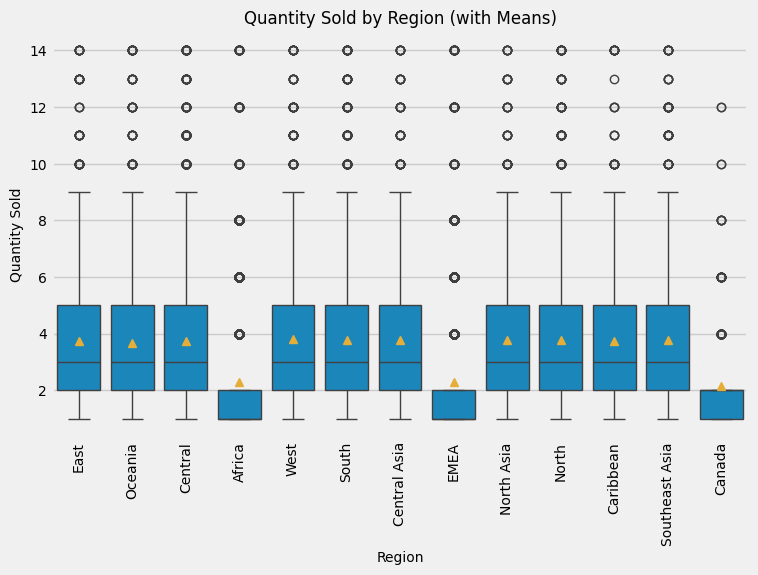

In [ ]:
# Boxplot (quantity by region)
plt.figure(figsize=(8, 5))
sns.boxplot(x="region", y="quantity", showmeans=True, data=df)  # showmeans=True to display mean values
plt.xlabel('Region')
plt.ylabel('Quantity Sold')
plt.title('Quantity Sold by Region (with Means)')
#tick rotation
plt.xticks(rotation=90)
plt.show()

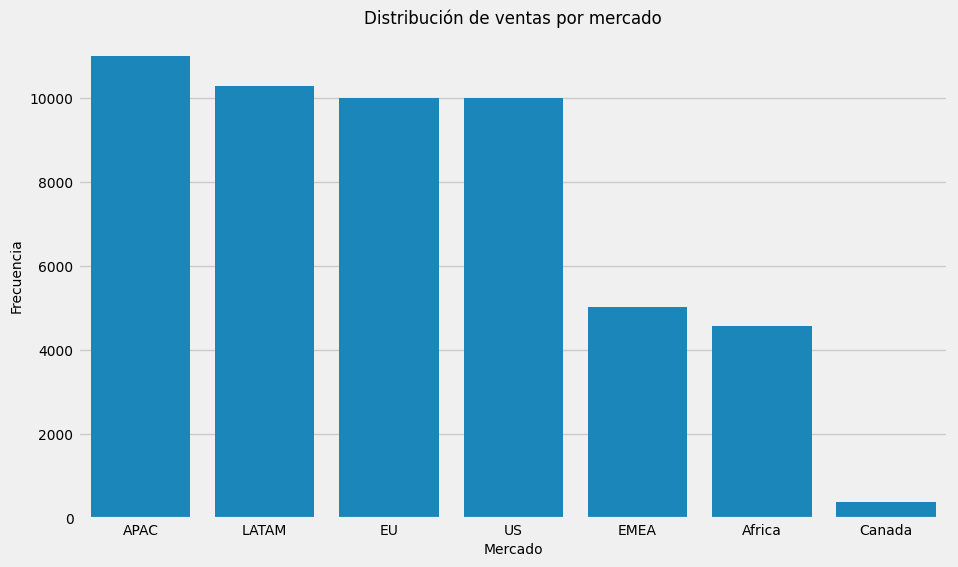

In [ ]:
# Distribución de ventas por mercado

# Testeamos otra forma de ordenar DESC los resultados del eje x
# Agrupar por mercado y contar las ventas
ventas_por_mercado = df.groupby('market')['market'].count()
# Ordenar los mercados de mayor a menor
orden_mercados = ventas_por_mercado.sort_values(ascending=False).index

# Crear el gráfico
sns.countplot(data=df, x='market', order=orden_mercados)
plt.title('Distribución de ventas por mercado')
plt.xlabel('Mercado')
plt.ylabel('Frecuencia')
plt.show()

**Series de tiempo**

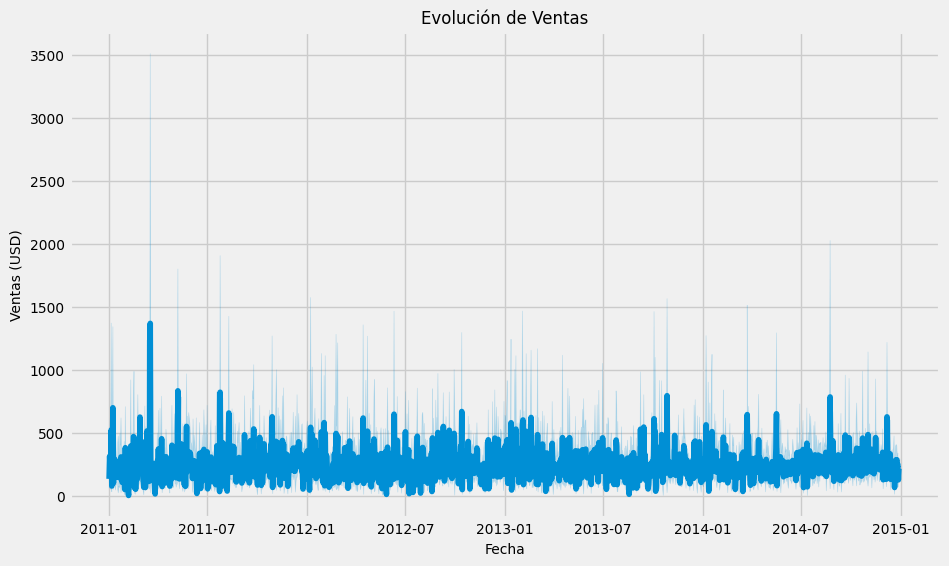

In [ ]:
# Gráfico de líneas con la evolución de sales
sns.lineplot(data=df, x='order_date', y='sales')
plt.title('Evolución de Ventas')
plt.xlabel('Fecha')
plt.ylabel('Ventas (USD)')
plt.show()

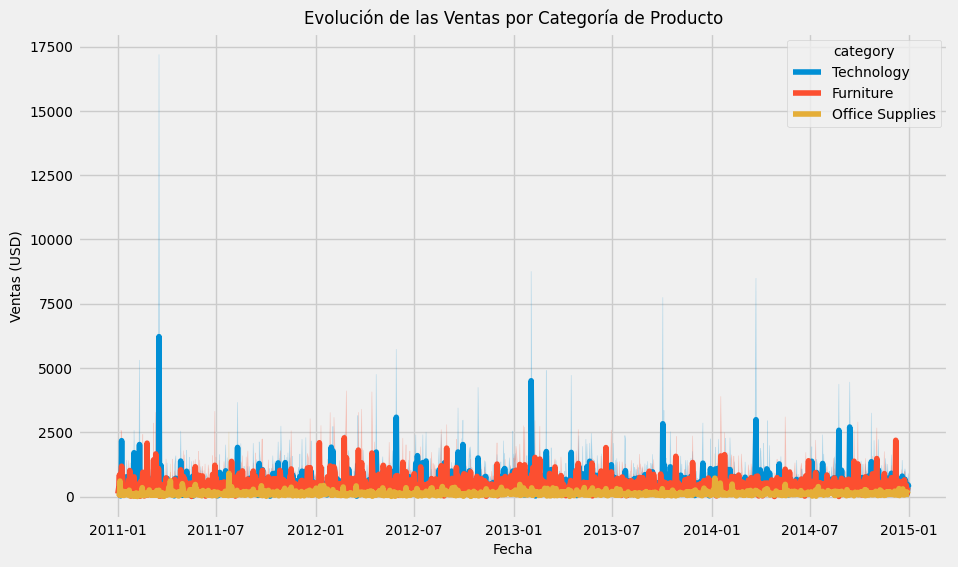

In [ ]:
# Evolución de las ventas por categoría de producto
sns.lineplot(data=df, x='order_date', y='sales', hue='category')
plt.title('Evolución de las Ventas por Categoría de Producto')
plt.xlabel('Fecha')
plt.ylabel('Ventas (USD)')
plt.show()

**Dispersión**

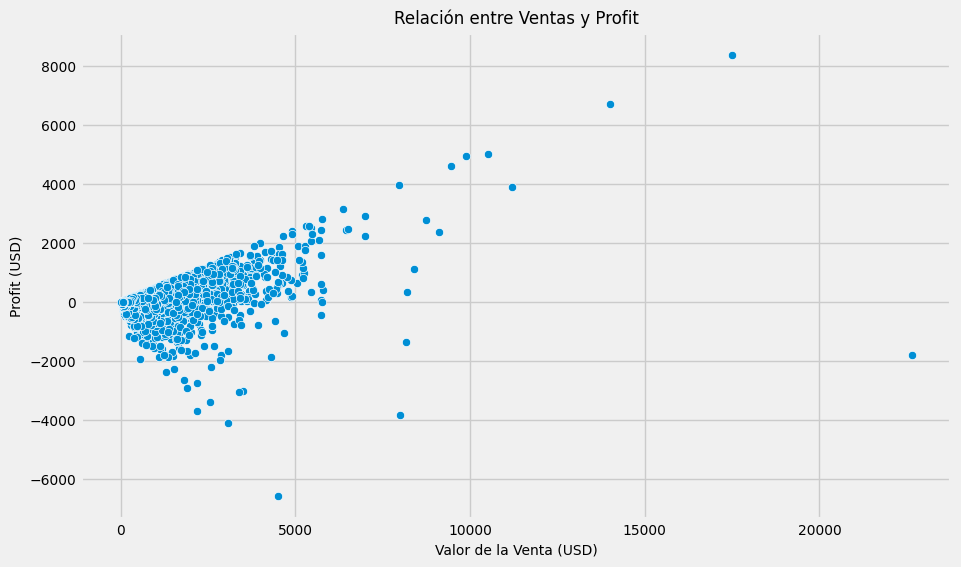

In [ ]:
# Gráfico de dispersión entre ventas y profit
sns.scatterplot(data=df, x='sales', y='profit')
plt.title('Relación entre Ventas y Profit')
plt.xlabel('Valor de la Venta (USD)')
plt.ylabel('Profit (USD)')
plt.show()

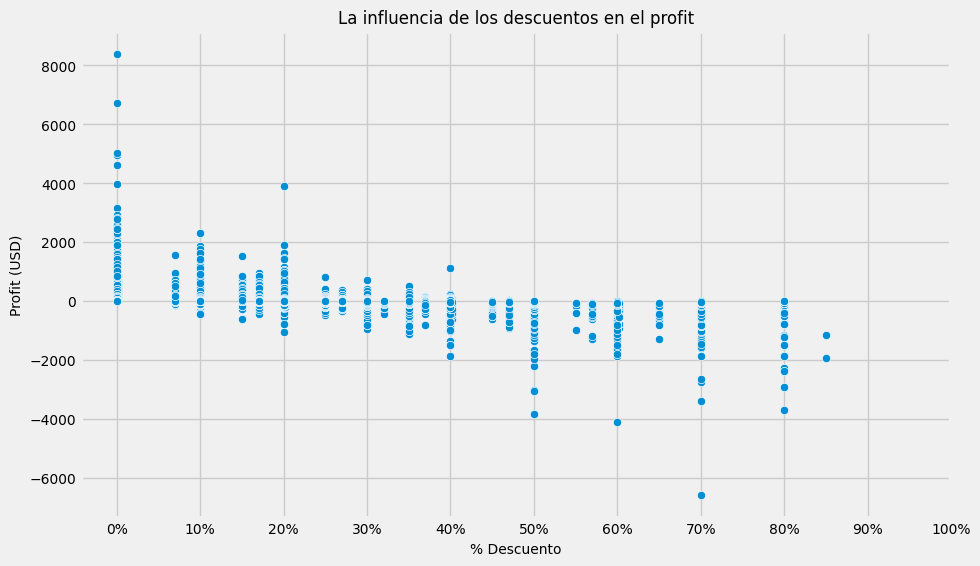

In [ ]:
# Dispersión entre descuento y profit

sns.scatterplot(data=df, x='discount', y='profit')
# Formatear los ticks del eje x como porcentajes
plt.xticks(np.arange(0, 1.1, 0.1), ['{:.0%}'.format(x) for x in np.arange(0, 1.1, 0.1)])

# personalización
plt.title('La influencia de los descuentos en el profit')
plt.xlabel('% Descuento')
plt.ylabel('Profit (USD)')
# print
plt.show()

De forma esperable, existe una correlación negativa entre los descuentos y el margen de beneficio. Sin embargo, es notable que a partir de un descuento del 25%, la disminución del profit se vuelve más pronunciada, evidenciando los rendimientos marginales decrecientes de los esfuerzos promocionales. Es decir, cada punto porcentual adicional de descuento a partir de este umbral genera una reducción proporcionalmente mayor en el rendimiento.

## Análisis multivariado

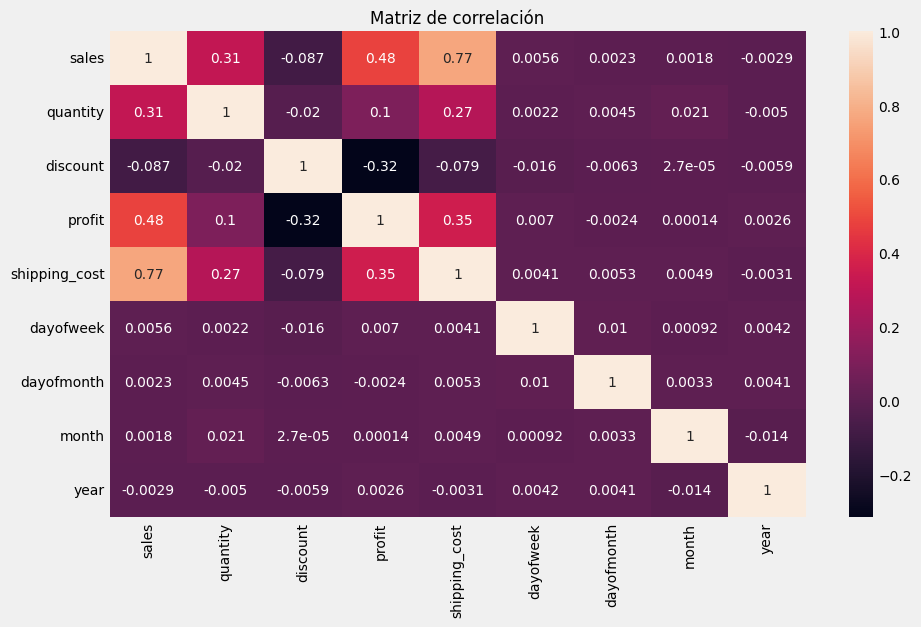

In [ ]:
# Matriz de correlación de variables numéricas
corr_matrix = df.select_dtypes(include=['number']).corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Matriz de correlación')
plt.show()

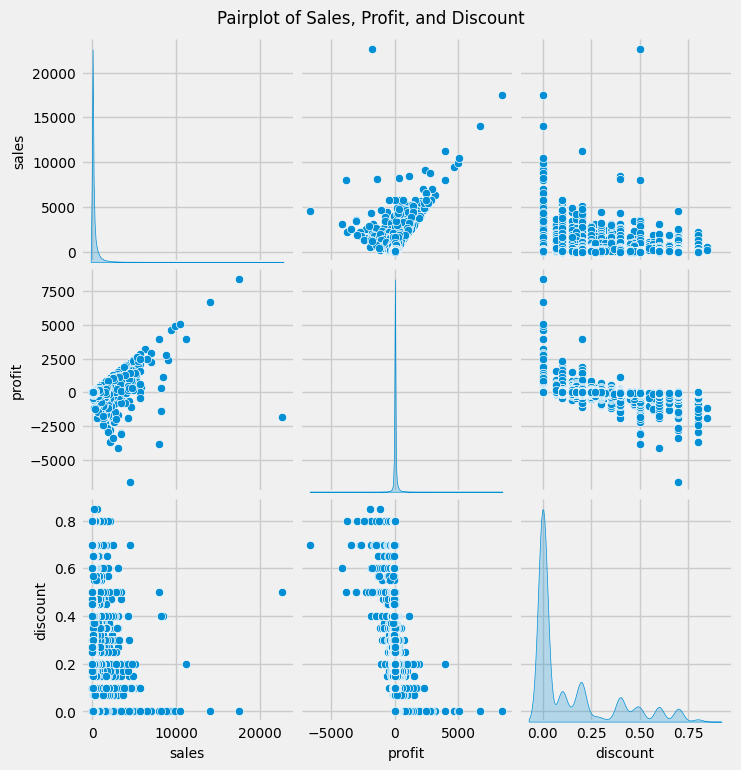

In [ ]:
# Pairplot of Sales, Profit, and Discount
sns.pairplot(df[["sales", "profit", "discount"]], diag_kind="kde")
plt.suptitle("Pairplot of Sales, Profit, and Discount", y=1.02)
plt.show()

## Conclusiones del EDA

#### A partir del análisis exploratorio se extraen las siguientes conclusiones:

- **Rendimientos marginales decrecientes en los descuentos**: Los descuentos, aunque inicialmente pueden estimular las ventas, presentan rendimientos marginales decrecientes. A partir de un descuento del 25%, la reducción en el margen de beneficio se acelera significativamente, evidenciando que cada punto porcentual adicional de descuento aporta cada vez menos a las ganancias. Esto sugiere que los esfuerzos promocionales más allá de este umbral podrían estar generando un impacto negativo en la rentabilidad. Se recomienda establecer un límite máximo de descuento en el rango del 20-25%.

- **Limitando los descuentos en mesas para maximizar el profit:** La subcategoría "Tables" tiene una estrategia de descuentos más agresiva que el resto, lo que está erosionando sus márgenes de ganancia. Se recomienda analizar los factores que impulsan los altos descuentos en "Tables" y ajustar la estrategia para alcanzar un equilibrio entre ventas y rentabilidad.

- La presencia de outliers positivos en las ventas de USA sugiere la existencia de nichos de mercado altamente rentables. Identificar y atender las necesidades específicas de estos segmentos puede generar un crecimiento significativo en las ventas.

#### Consideraciones para las siguientes fases del análisis:

- Los valores atípicos identificados en las columnas "sales" y "profit" no se consideran errores, sino indicadores de ventas excepcionales, posiblemente debido a factores como estacionalidad, promociones o características específicas de ciertos productos. Estos datos se mantendrán en el dataset para un análisis más detallado.
- La variable objetivo de este análisis es "sales", la cual representa los ingresos brutos diarios. Aunque "profit" no será la variable objetivo directa, su análisis en conjunto con "sales" puede proporcionar insights valiosos sobre la rentabilidad de estas ventas excepcionales.
- Para entrenar los modelos de forecasting, se creará un nuevo DataFrame agrupando las ventas por día. Este DataFrame incluirá las columnas de fecha (date, dayofweek, dayofmonth, etc) y las variables numéricas.
- Las variables categóricas (como categoría, subcategoría, mercado o segmento) no se incluirán en el dataset agrupado por día, ya que su granularidad se perdería al agrupar los datos. Estas variables son más relevantes para análisis a nivel de producto o cliente y pueden ser utilizadas en modelos posteriores para realizar predicciones más precisas.

# Preprocesamiento de los datos

## Backup del dataframe

In [ ]:
# creamos un backup del dataframe, llamado df_backup (por las dudas)
df_backup = df.copy()

### Creación de un dataframe agrupado por día

Para facilitar el análisis de series temporales y la aplicación de modelos de forecast (Prophet, ARIMA, etc), se ha decidido agrupar los datos por día. Esta transformación permite identificar patrones diarios y estacionales de manera más clara. Este dataset (df_daily) será utilizado para las series de tiempo de las proyecciones.

In [ ]:
# columns
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'segment', 'market',
       'region', 'category', 'sub_category', 'sales', 'quantity', 'discount',
       'profit', 'shipping_cost', 'order_priority', 'dayofweek', 'dayofmonth',
       'month', 'year'],
      dtype='object')

In [ ]:
# Crea una copia del dataframe llamado "df_daily".
#Debido a la agregación diaria, se pierden variables categóricas como categoría, segmento y mercado.
df_daily = df.groupby('order_date').agg({'dayofweek': 'first',
                                        'dayofmonth': 'first',
                                        'month': 'first',
                                        'year': 'first',
                                        'sales': 'sum',
                                        'quantity': 'sum',
                                        'discount': 'mean',
                                        'profit': 'sum',
                                        'shipping_cost': 'sum'}).reset_index()
df_daily.head()


,order_date,dayofweek,dayofmonth,month,year,sales,quantity,discount,profit,shipping_cost
0,2011-01-01,5,1,1,2011,808.57,19,0.133333,198.87,64.67
1,2011-01-02,6,2,1,2011,314.22,1,0.000000,3.12,24.10
2,2011-01-03,0,3,1,2011,4503.54,48,0.186000,184.60,471.42
3,2011-01-04,1,4,1,2011,2808.87,52,0.112625,635.12,224.94
4,2011-01-05,2,5,1,2011,3662.31,24,0.171429,1053.37,248.06


## Codificación de variables categóricas (df_encoded)

Si bien el conjunto de datos agrupado por día (df_daily), que servirá como base para el pronóstico, no presenta variables categóricas, he optado por **codificar las variables categóricas de una copia del dataframe** (df_encoded). Esta decisión se fundamenta en la importancia de dominar las técnicas de codificación para una adecuada preparación de datos y para reforzar los conocimientos adquiridos en este ámbito. (Aunque la codificación no sea necesaria por la naturaleza del dataset a utilizar y el modelo a correr)

In [ ]:
# Creamos una copia del dataframe df llamado df_encoded
df_encoded = df[['order_date', 'ship_date', 'ship_mode', 'segment', 'market', 'region',
                         'category', 'sub_category', 'sales', 'quantity', 'discount', 'profit',
                         'shipping_cost', 'order_priority', 'dayofweek', 'dayofmonth', 'month', 'year']].copy()


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_date      51290 non-null  datetime64[ns]
 1   ship_date       51290 non-null  datetime64[ns]
 2   ship_mode       51290 non-null  object        
 3   segment         51290 non-null  object        
 4   market          51290 non-null  object        
 5   region          51290 non-null  object        
 6   category        51290 non-null  object        
 7   sub_category    51290 non-null  object        
 8   sales           51290 non-null  float64       
 9   quantity        51290 non-null  int64         
 10  discount        51290 non-null  float64       
 11  profit          51290 non-null  float64       
 12  shipping_cost   51290 non-null  float64       
 13  order_priority  51290 non-null  object        
 14  dayofweek       51290 non-null  int32         
 15  da

**Resumen de las columnas**

- Variables numéricas: sales, quantity, discount, profit, shipping_cost, dayofweek, dayofmonth, month, year
- Variables categóricas: ship_mode, segment, market, region, category, sub_category, order_priority
- Variables de fecha: order_date, ship_date

> Se excluyeron las columnas order_id y country por cuestiones de rendimiento

**One-Hot Encoding**

In [ ]:
# Crear una lista con los nombres de las columnas categóricas
columnas_categoricas = ['ship_mode', 'segment', 'market', 'region', 'category', 'sub_category', 'order_priority']

In [ ]:
# Aplicar One-Hot Encoding y concatenar con el DataFrame
df_encoded = pd.concat([df_encoded.drop(columnas_categoricas, axis=1),
                pd.get_dummies(df_encoded[columnas_categoricas], drop_first=True)], axis=1)

print(df_encoded)

      order_date  ship_date    sales  quantity  discount  profit  \
0     2012-07-31 2012-07-31  2309.65         7       0.0  762.18   
1     2013-02-05 2013-02-07  3709.39         9       0.1 -288.76   
2     2013-10-17 2013-10-18  5175.17         9       0.1  919.97   
3     2013-01-28 2013-01-30  2892.51         5       0.1  -96.54   
4     2013-11-05 2013-11-06  2832.96         8       0.0  311.52   
...          ...        ...      ...       ...       ...     ...   
51285 2014-06-19 2014-06-19    65.10         5       0.0    4.50   
51286 2014-06-20 2014-06-24     0.44         1       0.8   -1.11   
51287 2013-12-02 2013-12-02    22.92         3       0.0   11.23   
51288 2012-02-18 2012-02-22    13.44         2       0.0    2.40   
51289 2012-05-22 2012-05-26    61.38         3       0.0    1.80   

       shipping_cost  dayofweek  dayofmonth  month  year  ship_mode_Same Day  \
0             933.57          1          31      7  2012                True   
1             923.63   

In [ ]:
#revisión
df_encoded.head()

,order_date,ship_date,sales,quantity,discount,profit,shipping_cost,dayofweek,dayofmonth,month,year,ship_mode_Same Day,ship_mode_Second Class,ship_mode_Standard Class,segment_Corporate,segment_Home Office,market_Africa,market_Canada,market_EMEA,market_EU,market_LATAM,market_US,region_Canada,region_Caribbean,region_Central,region_Central Asia,region_EMEA,region_East,region_North,region_North Asia,region_Oceania,region_South,region_Southeast Asia,region_West,category_Office Supplies,category_Technology,sub_category_Appliances,sub_category_Art,sub_category_Binders,sub_category_Bookcases,sub_category_Chairs,sub_category_Copiers,sub_category_Envelopes,sub_category_Fasteners,sub_category_Furnishings,sub_category_Labels,sub_category_Machines,sub_category_Paper,sub_category_Phones,sub_category_Storage,sub_category_Supplies,sub_category_Tables,order_priority_High,order_priority_Low,order_priority_Medium
0,2012-07-31,2012-07-31,2309.65,7,0.0,762.18,933.57,1,31,7,2012,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,2013-02-05,2013-02-07,3709.39,9,0.1,-288.76,923.63,1,5,2,2013,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,2013-10-17,2013-10-18,5175.17,9,0.1,919.97,915.49,3,17,10,2013,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
3,2013-01-28,2013-01-30,2892.51,5,0.1,-96.54,910.16,0,28,1,2013,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
4,2013-11-05,2013-11-06,2832.96,8,0.0,311.52,903.04,1,5,11,2013,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False


De esta forma, terminamos con un dataset codificado de forma numérica. Si tuviéramos más de 10 días para armar el proyecto final, me hubiera gustado escalar el alcance del mismo, y utilizar *df_encoded* para testear modelos de clustering, recomendación de productos, bundling, Customer Lifetime Value, Churn, etc.

En este caso nos concentraremos en modelos de forecasting, que requieren datos agregados de forma diaria (*df_daily*)

# Feature Selection

## Correlación

In [ ]:
# Importamos las librerías necesarias
from scipy.stats import pearsonr, spearmanr, chi2_contingency
from sklearn.feature_selection import SelectKBest, chi2

### Spearman

shipping_cost    0.953324
quantity         0.913484
profit           0.657570
order_date       0.379018
month            0.368533
year             0.296297
discount         0.058953
dayofmonth       0.011660
dayofweek       -0.458747
Name: sales, dtype: float64


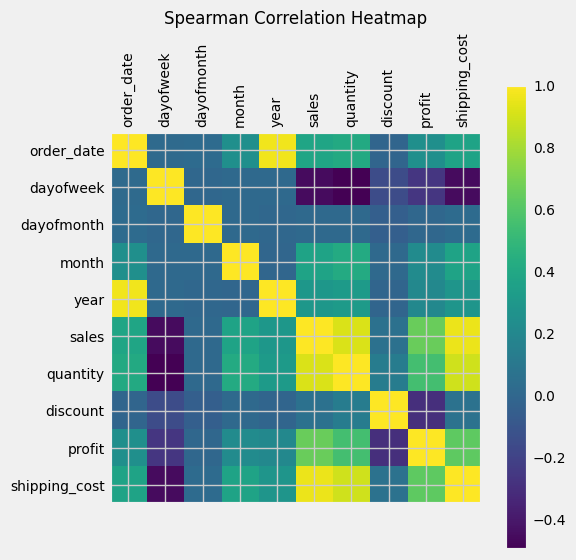

In [ ]:
# Calculamos la matriz de correlación de Spearman
corr_matrix_spearman = df_daily.corr(method='spearman')

# Extraemos la fila correspondiente a 'sales'
sales_correlation_spearman = corr_matrix_spearman['sales']

# Ordenamos las correlaciones de mayor a menor (excluyendo la correlación de 'sales' consigo misma)
sorted_correlations_spearman = sales_correlation_spearman.drop('sales').sort_values(ascending=False)

# Mostramos las correlaciones ordenadas
print(sorted_correlations_spearman)

# Create a heatmap
plt.matshow(corr_matrix_spearman)
plt.xticks(range(len(corr_matrix_spearman.columns)), corr_matrix_spearman.columns, rotation=90)
plt.yticks(range(len(corr_matrix_spearman.columns)), corr_matrix_spearman.columns)

plt.colorbar()
plt.title("Spearman Correlation Heatmap")
plt.show()

#### Análisis resultados: Spearman



- **shipping_cost (0.953324)**: Existe una correlación positiva muy fuerte entre el costo de envío y las ventas. Esto sugiere que, en general, los días en los que los costos de envío son más altos, también se asocian con mayores ingresos por ventas. Esto podría indicar que productos con un costo de envío más elevado suelen tener un precio de venta más alto o que los clientes están dispuestos a pagar más por un envío más rápido.

- **quantity (0.913484)**: La alta correlación positiva es esperable. Significa que a mayor cantidad de productos vendidos, mayores serán las ventas totales.

- **profit (0.657570)**: Una correlación positiva moderada indica que, en general, un aumento en las ventas se traduce en un aumento en las ganancias. Sin embargo, factores como los márgenes de beneficio pueden influir en esta relación.

- **order_date, month, year**: Las correlaciones positivas con estas variables indican una tendencia al alza en las ventas a lo largo del tiempo. Esto podría deberse a un crecimiento general del negocio, a campañas de marketing exitosas o a otros factores externos.

- **discount (0.058953)**: La correlación muy débil sugiere que los descuentos no tienen un impacto significativo en el volumen de ventas total. Esto podría indicar que los descuentos no son lo suficientemente atractivos para los clientes o que se están aplicando de manera ineficiente.

- **dayofmonth, dayofweek**: Las correlaciones cercanas a cero indican que el día del mes o de la semana no tienen una influencia significativa en las ventas.

> En conclusión, resulta relevante utilizar las variables shipping_cost y quantity (regresores, etc).



### Pearson

shipping_cost    0.935502
quantity         0.902306
profit           0.649559
order_date       0.399476
month            0.383380
year             0.313223
dayofmonth       0.013477
discount        -0.025275
dayofweek       -0.390578
Name: sales, dtype: float64


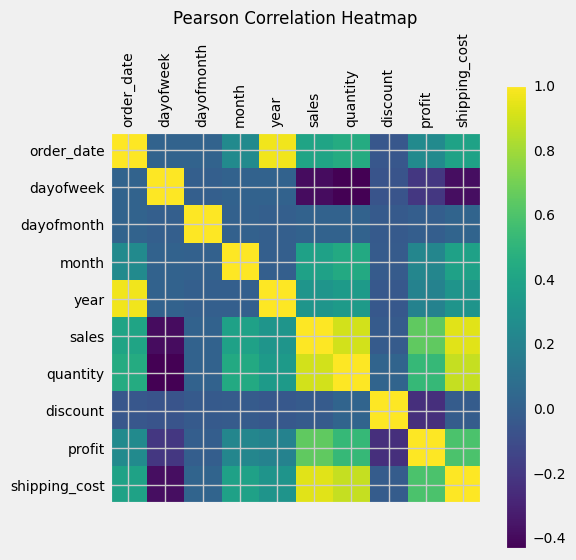

In [ ]:
# Calculamos la correlación de Pearson
corr_matrix_pearson = df_daily.corr(method='pearson')

# Extraemos la fila correspondiente a 'sales'
sales_correlation_pearson = corr_matrix_pearson['sales']

# Ordenamos las correlaciones de mayor a menor (excluyendo la correlación de 'sales' consigo misma)
sorted_correlations_pearson = sales_correlation_pearson.drop('sales').sort_values(ascending=False)

# Mostramos las correlaciones ordenadas
print(sorted_correlations_pearson)

# visualizamos un heatmap
plt.matshow(corr_matrix_pearson)
plt.xticks(range(len(corr_matrix_pearson.columns)), corr_matrix_pearson.columns, rotation=90)
plt.yticks(range(len(corr_matrix_pearson.columns)), corr_matrix_pearson.columns)

plt.colorbar()
plt.title("Pearson Correlation Heatmap")
plt.show()

#### Análisis de los resultados: Pearson

- **Relación positiva fuerte**: Las ventas están muy relacionadas con "shipping_cost" y "quantity". Esto significa que a medida que aumenta el costo de envío o la cantidad de productos vendidos, también tienden a aumentar las ventas.

- **Relación débil o nula**: Las ventas tienen relaciones débiles con "year", "discount", y "dayofmonth". No existe una relación significativa entre las ventas y estos factores. Además, hay una correlación negativa moderada entre las ventas y "dayofweek", lo que indica que las ventas podrían ser más bajas en ciertos días de la semana.

### Resultados del análisis de correlación de variables

Los valores de ambos coeficientes (Spearman y Pearson) son muy similares para la mayoría de las variables, lo que sugiere que las relaciones entre estas variables y las ventas son probablemente monótonas y relativamente lineales.

**Variable objetivo:**
- sales: La principal métrica que buscaremos modelar y predecir es la de ventas.

**Análisis de las variables:**
- shipping_cost, quantity, profit: Las correlaciones muy altas cercanas a 1.00 indican fuertes relaciones lineales positivas. Las ventas tienden a aumentar a medida que aumentan estas variables.
- month: La correlación moderadamente positiva de alrededor de 0.95 sugiere una tendencia de aumento de las ventas a lo largo de los meses. Esto sugiere la necesidad de utilizar un seasonality_mode multiplicativo (vs aditivo).
- discount: Los coeficientes cercanos a cero indican una relación débil o insignificante entre el descuento y las ventas.
- dayofmonth, dayofweek: Las correlaciones bajas cercanas a cero sugieren poca o ninguna relación lineal entre las ventas y el día del mes o el día de la semana. Sin embargo, la correlación de Spearman ligeramente negativa para "dayofweek" sugiere una posible relación monótona débil, donde las ventas podrían ser más bajas en ciertos días de la semana.

### Selección de variables

Para el modelado de Forecasting hemos seleccionado las variables:
- **sales** como variable objetivo
- **date** como variable independiente
- **shipping_cost** y **quantity** como posibles regresores

# Modelado: Prophet

En este análisis, utilizaremos Prophet, una herramienta de forecasting desarrollada por META para predecir las ventas diarias futuras. Prophet es un modelo estadístico diseñado específicamente para pronosticar series de tiempo con patrones estacionales y tendencias no lineales. Esta herramienta es ideal para datos con componentes como tendencias de crecimiento, estacionalidad anual y semanal, y la capacidad de incorporar eventos especiales que puedan afectar las ventas.

In [ ]:
# df_daily columns
df_daily.columns

Index(['order_date', 'dayofweek', 'dayofmonth', 'month', 'year', 'sales',
       'quantity', 'discount', 'profit', 'shipping_cost'],
      dtype='object')

In [ ]:
# Importamos librerías: Prophet
from prophet import Prophet
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import plotly.express as px

## Prophet v.1

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprd59enqy/ckg24h55.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprd59enqy/xp__avkh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18261', 'data', 'file=/tmp/tmprd59enqy/ckg24h55.json', 'init=/tmp/tmprd59enqy/xp__avkh.json', 'output', 'file=/tmp/tmprd59enqy/prophet_modelucztsean/prophet_model-20240814221032.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:10:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:10:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in 

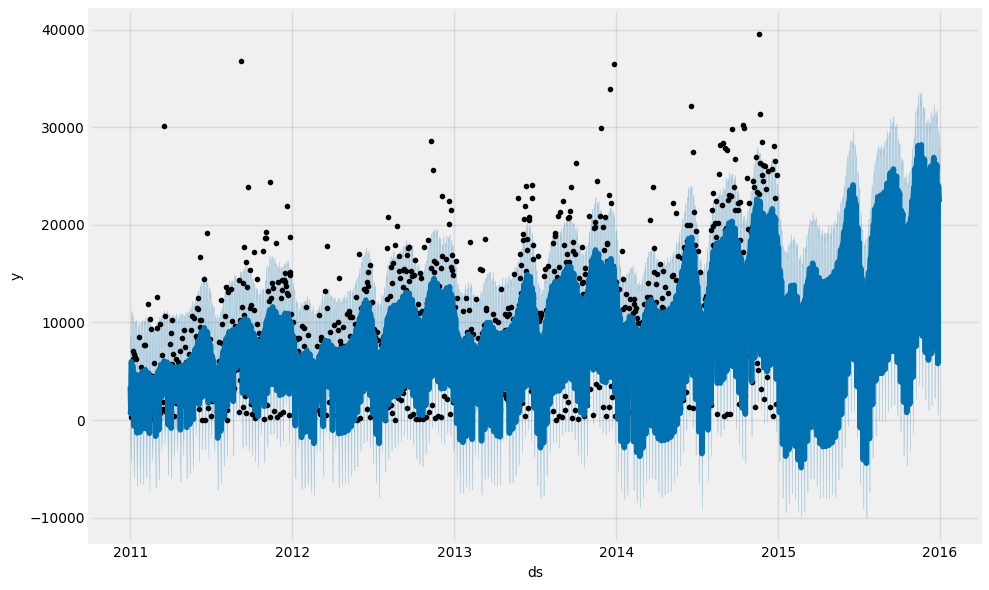

In [ ]:
# Creamos un nuevo dataframe para Prophet, usando el df daily
df_prophet_1 = df_daily[['order_date', 'sales']].copy()

# Renombrar las columnas para que coincidan con los requerimientos de Prophet
df_prophet_1 = df_prophet_1.rename(columns={'order_date': 'ds', 'sales': 'y'})

# Crear el modelo de Prophet
model = Prophet(seasonality_mode='multiplicative')  # Utilizamos multiplicative porque la amplitud de la estacionalidad aumenta a medida que aumenta el nivel de la serie de tiempo

# Ajustar el modelo a los datos históricos
model.fit(df_prophet_1)

# Crear un DataFrame futuro para los próximos 12 meses
future = model.make_future_dataframe(periods=365)

# Generar las predicciones
forecast = model.predict(future)

# Visualizar el pronóstico
fig1 = model.plot(forecast)
plt.show()

### Validación del modelo (Prophet_v1)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprd59enqy/q2fo3vf7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprd59enqy/hjpvv4io.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26887', 'data', 'file=/tmp/tmprd59enqy/q2fo3vf7.json', 'init=/tmp/tmprd59enqy/hjpvv4io.json', 'output', 'file=/tmp/tmprd59enqy/prophet_model1k7bvd94/prophet_model-20240814232226.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:22:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:22:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MAE: 7237.609303443396
MAPE: 3.105324313192626
RMSE: 8955.55301833902


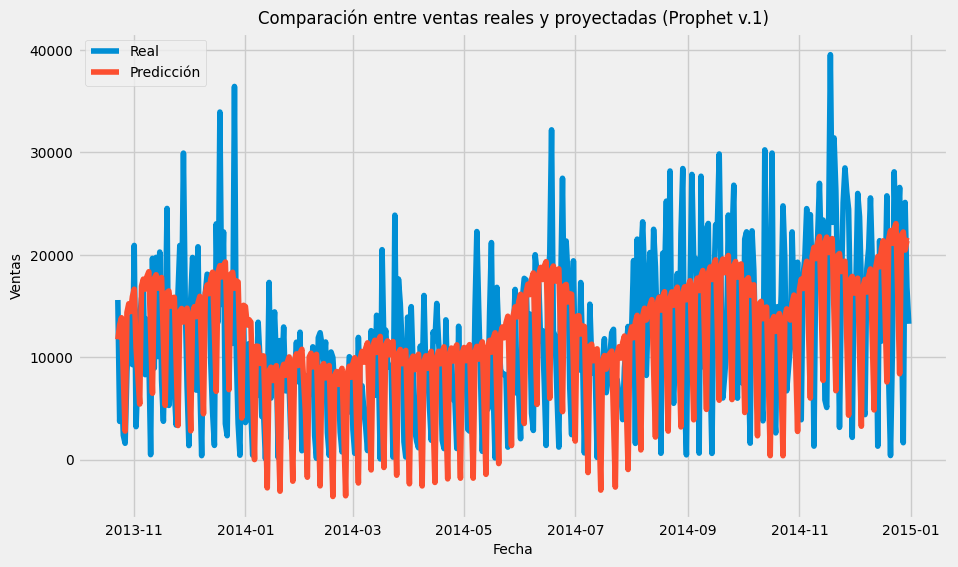

In [ ]:
# Creamos un nuevo dataframe para Prophet, usando el df daily
df_prophet = df_daily[['order_date', 'sales']].copy()

# Renombrar las columnas para que coincidan con los requerimientos de Prophet
df_prophet = df_prophet.rename(columns={'order_date': 'ds', 'sales': 'y'})

# Dividir los datos en conjuntos de entrenamiento y prueba (70/30)
train_size = int(len(df_prophet) * 0.7)
train_df = df_prophet.iloc[:train_size]
test_df = df_prophet.iloc[train_size:]

# Crear el modelo de Prophet
model = Prophet(seasonality_mode='multiplicative')

# Ajustar el modelo a los datos de entrenamiento
model.fit(train_df)

# Generar predicciones para el conjunto de prueba
future = model.make_future_dataframe(periods=len(test_df))
forecast = model.predict(future)

# Extraer las predicciones para el período de prueba
forecast_test = forecast.iloc[train_size:]

# Calcular las métricas de error
y_true = test_df['y']
y_pred = forecast_test['yhat']
mae = mean_absolute_error(y_true, y_pred)
mape = mean_absolute_percentage_error(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred, squared=False)

# Imprimir las métricas de error
print('MAE:', mae)
print('MAPE:', mape)
print('RMSE:', rmse)

# Visualizar la diferencia entre la proyección y el real
plt.plot(test_df['ds'], y_true, label='Real')
plt.plot(test_df['ds'], y_pred, label='Predicción')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.title('Comparación entre ventas reales y proyectadas (Prophet v.1)')
plt.legend()
plt.show()


In [ ]:
# IQR
sales_iqr = df_daily['sales'].quantile(0.75) - df_daily['sales'].quantile(0.25)
print("Interquartile Range:", sales_iqr)

Interquartile Range: 8671.719999999998


#### Resultados del testeo

- **MAE (Mean Absolute Error): 7237.61**
> Dado que el MAE es similar al IQR (8671.72), indica que el modelo tiene dificultades para predecir con mucha precisión. El error promedio es comparable a la variabilidad natural de las ventas, lo que sugiere que el modelo podría estar subestimando o sobreestimando las ventas en una cantidad significativa.

- **MAPE (Mean Absolute Percentage Error): 3.11%**
> El MAPE nos da una idea del error relativo. Un 3.10% indica que, en general, las predicciones son razonablemente precisas, pero aún hay margen de mejora.

- **RMSE (Root Mean Squared Error): 8955.55**
> Al igual que el MAE, el RMSE siendo similar al IQR indica que el modelo tiene dificultades para capturar la variabilidad de los datos en algunos casos. Esto podría deberse a la presencia de valores atípicos o a cambios estacionales que el modelo no está capturando adecuadamente.

#### Interpretación general:
- **Desempeño moderado**: El modelo Prophet está capturando algunas de las tendencias en los datos, pero no es extremadamente preciso.
- **Margen de mejora**: Tanto el MAE como el RMSE sugieren que hay espacio para mejorar la precisión del modelo.
- **Considerar factores externos**: Es posible que eventos externos no considerados por el modelo (como promociones, cambios en la economía, etc.) estén afectando las ventas y causando los errores observados.

## Optimización del modelo (*Prophet v.2*)

Con el fin de optimizar el ajuste de Prophet, se integran los regresores **shipping_cost** y **quantity**.

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprd59enqy/361n6x5d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprd59enqy/ng_y3dw8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56596', 'data', 'file=/tmp/tmprd59enqy/361n6x5d.json', 'init=/tmp/tmprd59enqy/ng_y3dw8.json', 'output', 'file=/tmp/tmprd59enqy/prophet_modelp4w5unpt/prophet_model-20240814231358.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:13:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:13:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MAE: 1546.8580019405686
MAPE: 0.20827152070335636
RMSE: 2191.1176469524657


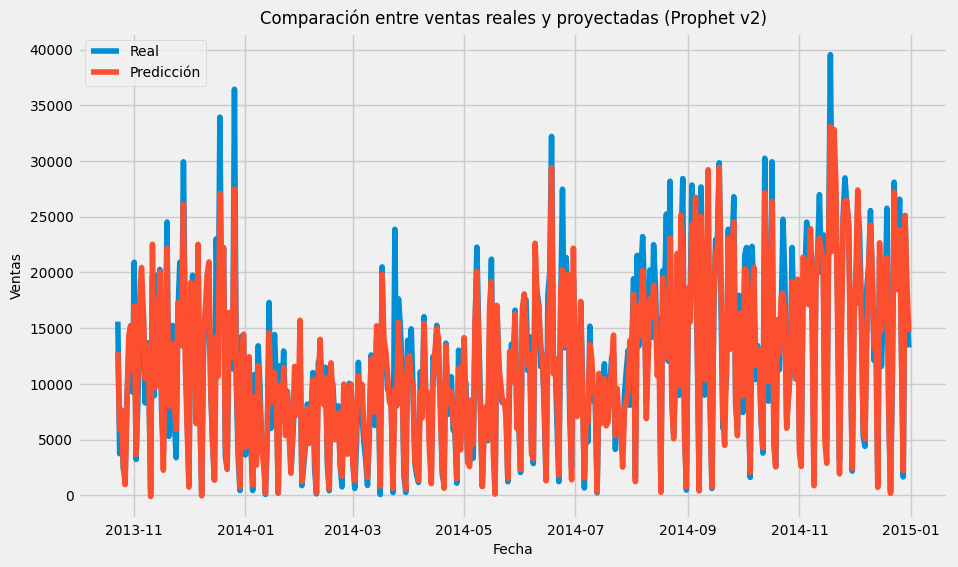

In [ ]:

df_prophet_2 = df_daily[['order_date', 'sales', 'shipping_cost', 'quantity']].copy()
df_prophet_2 = df_prophet_2.rename(columns={'order_date': 'ds', 'sales': 'y'})

# Dividir los datos en conjuntos de entrenamiento y prueba (70/30)
train_size = int(len(df_prophet_2) * 0.7)
train_df = df_prophet_2.iloc[:train_size]
test_df = df_prophet_2.iloc[train_size:]

# Modelo
model = Prophet(seasonality_mode='multiplicative')

# Regresores
model.add_regressor('shipping_cost')
model.add_regressor('quantity')

# Ajustar el modelo a los datos de entrenamiento
model.fit(train_df)

# FCAST
future = model.make_future_dataframe(periods=len(test_df))
future['shipping_cost'] = df_prophet_2['shipping_cost']
future['quantity'] = df_prophet_2['quantity']
forecast = model.predict(future)

# Extraer las predicciones para el período de prueba
forecast_test = forecast.iloc[train_size:]

# Métricas de error
y_true = test_df['y']
y_pred = forecast_test['yhat']
mae = mean_absolute_error(y_true, y_pred)
mape = mean_absolute_percentage_error(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred, squared=False)

# Imprimir métricas de error
print('MAE:', mae)
print('MAPE:', mape)
print('RMSE:', rmse)

# Visualizar la diferencia entre la proyección y el real
plt.plot(test_df['ds'], y_true, label='Real')
plt.plot(test_df['ds'], y_pred, label='Predicción')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.title('Comparación entre ventas reales y proyectadas (Prophet v2)')
plt.legend()
plt.show()


In [ ]:
# IQR sales
sales_iqr = df_daily['sales'].quantile(0.75) - df_daily['sales'].quantile(0.25)
print("Interquartile Range:", sales_iqr)

Interquartile Range: 8671.719999999998


### Resultados de la iteración (*Prophet_v2*)

 - **MAE (1546)**: El MAE de 1546.86 es significativamente menor que el IQR de 8671. Esto indica que el modelo optimizado está capturando mucho mejor la variabilidad de los datos.

 - **MAPE (0.2%)**: Un MAPE de 0.21% es **extremadamente bajo**, lo que sugiere una precisión muy alta en las predicciones.

 - **RMSE (2191)**: Aunque el RMSE ha disminuido, sigue siendo considerable en comparación con el MAE. Esto podría indicar la presencia de algunos valores atípicos o eventos inusuales que **aún** no están siendo capturados completamente por el modelo.


**Conclusiones:**

- Mejora sustancial: La incorporación de las variables shipping_cost y quantity ha llevado a una mejora significativa en el desempeño del modelo Prophet.
- Mayor precisión: Las predicciones del modelo 2 son mucho más precisas y confiables que las del modelo original.
- Potencial de mejora: Aunque el modelo optimizado ha mostrado un gran desempeño, aún hay margen para mejorar. Los siguientes pasos lógicos incluyen testear otros regresores (ej. discount, month, dayofweek, dayofmonth, etc), ajustar los hiperparámetros o considerar modelos más complejos para capturar aún más la variabilidad de los datos.

### Comparativa entre iteraciones (v1 vs. v2)

In [ ]:
# Crea un DataFrame con los datos de los dos modelos
data = {'Métrica': ['MAE', 'MAPE', 'RMSE'],
        'Prophet 1': [7237.61, 3.10, 8955.55],
        'Prophet 2': [1546.86, 0.21, 2191.12],
        'Diferencia': [-5690.75, -2.89, -6764.43]}
comparativa_prophet = pd.DataFrame(data)

# Muestra la tabla
print(comparativa_prophet)

  Métrica  Prophet 1  Prophet 2  Diferencia
0     MAE    7237.61    1546.86    -5690.75
1    MAPE       3.10       0.21       -2.89
2    RMSE    8955.55    2191.12    -6764.43


- **MAE**: El error absoluto medio se ha reducido drásticamente. Esto significa que, en promedio, las predicciones del modelo 2 están mucho más cerca de los valores reales. La inclusión de las variables regresoras ha permitido capturar mejor la variabilidad en las ventas.
- **MAPE**: El error absoluto medio porcentual también ha disminuido significativamente. Esto indica que las predicciones del modelo 2 son mucho más precisas en términos relativos. Las predicciones están, en promedio, a menos del 0.21% del valor real.
- **RMSE**: La raíz del error cuadrático medio también ha disminuido, aunque en menor proporción que las otras métricas. Esto sugiere que el modelo 2 está cometiendo menos errores grandes, pero aún podría haber algunos casos donde las predicciones están bastante lejos de los valores reales.

Prophet v.1:

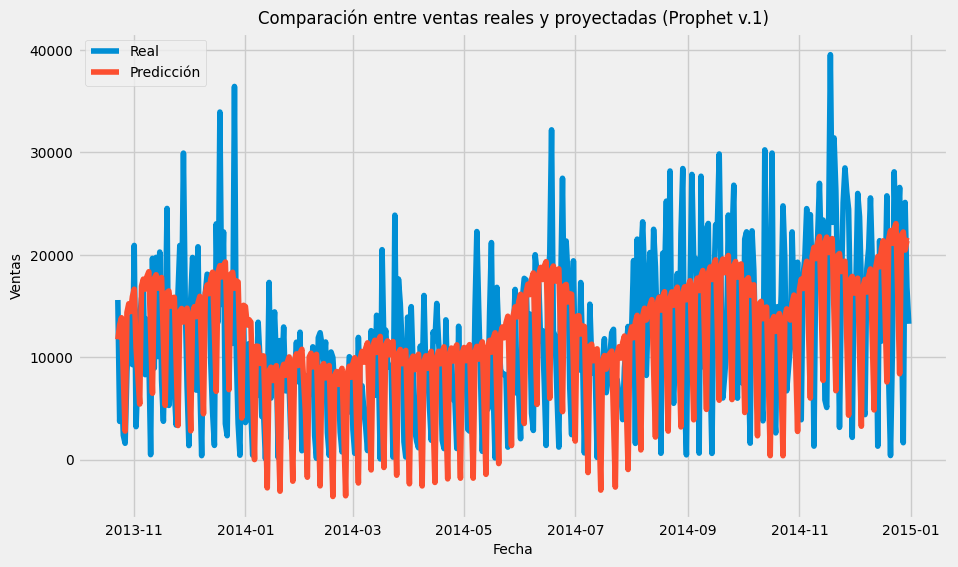

Prophet v.2:

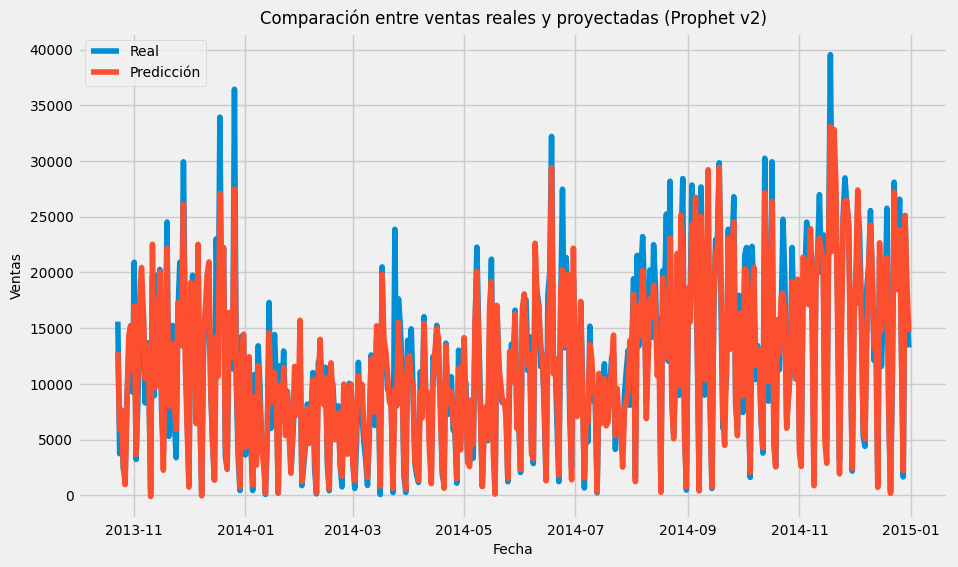

- De forma evidente, la iteración v2 del modelo Prophet presenta un ajuste mucho mejor, identificando con más precisión la variabilidad de las ventas.

# Modelado: GLMnet

Con el objetivo de testear un modelo adicional a Prophet, he decidido generar una proyección de ventas usando GLMNet.

**glmnet** es una librería de R extremadamente popular y eficiente para ajustar modelos lineales generalizados con regularización Lasso o Elastic Net. Esta técnica es especialmente útil para prevenir el sobreajuste en modelos, seleccionar las características más relevantes y mejorar la capacidad de generalización de los modelos. Por cuestiones de tiempos, me concentraré en entrenar y testear la predicción de ventas (sales), usando shipping_cost y quantity como regresores.

RMSE: 2113.2391129294438
MAE: 1542.0661295759353
MAPE: 0.8165127001639129


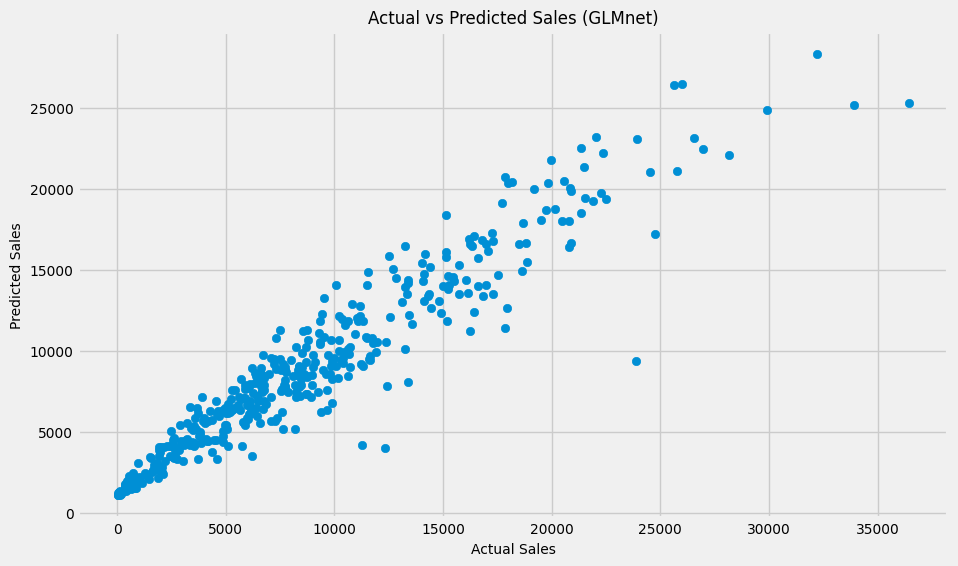

In [ ]:
# IMPORT
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from math import sqrt

# Prepare data
X = df_daily[['shipping_cost', 'quantity']]
y = df_daily['sales']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create ++ train GLMnet (ElasticNet)
model = ElasticNet(alpha=0.5, l1_ratio=0.5)  #  alpha + l1_ratio adj.
model.fit(X_train_scaled, y_train)

# predict
y_pred = model.predict(X_test_scaled)

# evaluate
rmse = sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print('MAE:', mae)
print('MAPE:', mape)
print('RMSE:', rmse)

# Visualize predictions vs actual values /scatter para variar
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales (GLMnet)')
plt.show()




- **MAE (1542)**: El valor está muy cerca del IQR (8671). En comparación con Prophet_2 (1546), el modelo tiene un **rendimiento similar**.

- **MAPE (0.8%)**: El valor es aceptable, pero **más alto que Prophet_2** (0.2%). Esto indica que el modelo glmnet podría tener un mayor error relativo en sus predicciones.

- **RMSE (2113)**: El valor está cerca del IQR, pero ligeramente más alto que Prophet_2 (2191). En general, el modelo glmnet parece tener un **rendimiento similar** a Prophet 2 en términos de RMSE.

- En general, tanto glmnet como Prophet 2 lograron un rendimiento similar basado en MAE y RMSE. Sin embargo, glmnet tiene un MAPE ligeramente más alto, lo que sugiere que podría tener un mayor error relativo en sus predicciones.

# Conclusiones

- Los modelos de forecasting han demostrado ser eficaces para identificar **patrones estacionales** en las ventas, permitiendo proyectar con precisión los períodos de alta y baja demanda.

- **Prophet vs. glmnet**: Tanto Prophet como glmnet han demostrado un buen ajuste a los datos, con valores de MAE y RMSE relativamente cercanos al IQR. Esto indica que ambos modelos capturan la tendencia y la estacionalidad de los datos de manera efectiva.  Sin embargo, glmnet presenta un MAPE significativamente mayor que Prophet 2. Esto sugiere que las predicciones de glmnet podrían ser menos precisas en términos relativos, especialmente para mercados con ventas volumenes de ventas diarios más pequeños.

- **Prophet** se posiciona como el **modelo con el mejor ajuste** para las proyecciones futuras de la empresa. Tras un análisis exhaustivo de las métricas de error (MAE, MAPE, RMSE) y una comparación detallada con glmnet, se ha determinado que Prophet ofrece un rendimiento más robusto y preciso. Adicionalmente, se sugiere implementar una iteración más de optimización de hiperparámetros, para que Prophet genere proyecciones aún más confiables y precisas.

- **Escalabilidad del proyecto**: La proyección de series temporales ofrece una gran cantidad de variabilidad y dinamismo a la hora de modelar: se pueden correr proyecciones por mercado, segmento o categoría, para identificar sesgos estacionales que provean a distintos interlocutores con información valiosa y relevante. (Por ej. dándole al director regional de Norteamerica una proyección localizada de las ventas en su mercado).

- A futuro, es recomendable testear y comparar el rendimiento de ARIMA vs. Prophet y glmnet, para seleccionar el mejor modelo para proyectar las ventas de la empresa.

- El análisis de sensibilidad de los **descuentos** revela una relación no lineal entre el descuento y las ventas, lo que sugiere la existencia de un punto óptimo de descuento a partir del cual los beneficios marginales disminuyen (25-30% aprox). Asimismo, el bajo margen de beneficio de la subcategoría "tables" plantea **interrogantes sobre la rentabilidad de esta línea de productos**. Estos dos factores fueron identificados en el EDA, por lo que, en caso de escalar y realizar un análisis profundo que incluya cortes regionales, de usuarios o de producto, se podrían identificar aún más insights de alto valor para el negocio.

## Recomendaciones estratégicas para capitalizar la estacionalidad

**Planificación de la producción:**
- Optimizar el inventario: Implementar sistemas de gestión de inventario que permitan ajustar los niveles de stock en función de las fluctuaciones estacionales.

**Gestión de la demanda:**
- Promociones y descuentos: Ofrecer promociones y descuentos estratégicos durante los períodos de baja demanda para estimular las ventas.
- Marketing segmentado: Diseñar campañas de marketing personalizadas para diferentes segmentos de clientes, aprovechando las preferencias estacionales.
- Programas de fidelización: Implementar programas de fidelización para incentivar las compras repetidas y aumentar la retención de clientes.

**Análisis de la competencia:**
- Monitoreo continuo: Realizar un seguimiento constante de las acciones de la competencia para identificar oportunidades y amenazas.
- Diferenciación: Desarrollar estrategias de diferenciación para destacarse de la competencia durante los períodos de alta demanda.

**Desarrollo de nuevos productos:**
- Productos estacionales: Introducir nuevos productos o servicios que se adapten a las preferencias de los consumidores durante diferentes épocas del año.
- Expansión de categorías: Explorar nuevas categorías de productos que puedan complementar la oferta actual y reducir la dependencia de productos estacionales.

**Colaboraciones estratégicas:**
- Alianzas: Establecer alianzas con proveedores, distribuidores y otros actores de la cadena de suministro para garantizar la disponibilidad de productos y servicios durante los períodos de alta demanda.


Fin. Muchas gracias.